In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import re
from urllib.parse import quote
import time
%matplotlib inline

In [2]:
df=pd.read_csv('Orders.csv')
df.head()

C:\Users\Amadeus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [3]:
df['new_DateId'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 29 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [4]:
df_clean=df.dropna(subset=['City'])

In [5]:
df.shape[0]

5495276

In [6]:
df_clean.shape[0]

5495267

In [7]:
df_clean.groupby(by='City')['Quantity'].sum()

City
1st         45
25          10
<fo         41
Aya          2
Cha          1
Daf          2
Hsi          3
Hy           6
Ins          2
Jia          3
Kao          5
Keb          3
Kot          2
Nan         28
New         32
No.          3
Quậ          6
Tai          8
Tao         18
Xin          5
Đại          1
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東市        431
台東縣      34786
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東市        776
屏東縣     125121
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599460
桃園縣         93
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

In [8]:
df_clean = df_clean.drop(df_clean[(df_clean['City'] < '\u4e00' )].index).drop(df_clean[(df_clean['City'] > '\u9fff' )].index)
df_clean.groupby(by='City')['Quantity'].sum()

City
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東市        431
台東縣      34786
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東市        776
屏東縣     125121
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599460
桃園縣         93
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

In [9]:
def new_city(city):
    if city =='桃園縣':
        return '桃園市'
        
    elif city == '台北縣':        
        return  '新北市'
        
    elif city == '台東市':
        return  '台東縣'
            
    elif city == '屏東市':        
        return  '屏東縣'
        
    elif city == '台南縣':        
        return  '台南市'
    else:
        return city
df_clean['City']=df_clean['City'].apply(new_city)
df_clean.groupby(by='City')['Quantity'].sum()

City
南投縣      74939
台中市     815918
台北市     705464
台南市     407470
台東縣      35217
嘉義市      55276
嘉義縣      68262
基隆市      89367
宜蘭縣      87111
屏東縣     125897
彰化縣     201898
新北市    1196609
新竹市     148414
新竹縣     129924
桃園市     599553
澎湖縣      20190
花蓮縣      69475
苗栗縣     108647
雲林縣      88407
高雄市     580556
Name: Quantity, dtype: int64

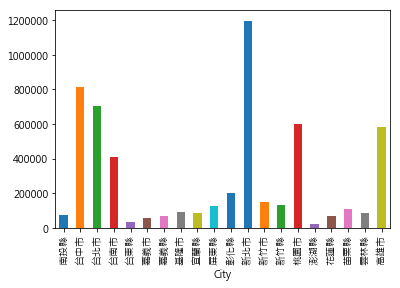

In [10]:
df_clean_city=df_clean.groupby(by='City')['Quantity'].sum()
df_clean_city.plot.bar()

In [11]:
url = "http://e-service.cwb.gov.tw/HistoryDataQuery/QueryDataController.do?command=viewMain&_=1528379589863"
html = requests.get(url)
soup = BeautifulSoup(html.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="css/bg.css" rel="stylesheet" type="text/css"/>
  <style type="text/css">
   div{margin:0;padding:0}
#container{width:800px;height:500px;border:0px ;}
#container .box1{position:relative;width:440px;height:auto;float: left;}
#container .box2{margin-left: 10px;width:330px;height:auto;float:left;}
#container .box3{margin-left: 10px;margin-top: 230px;width:330px;height:auto;float:left;}
  </style>
  <style id="hideCalendar">
  </style>
  <style id="hideMonth">
  </style>
  <link href="css/jquery-ui-1.10.3.custom.css" rel="stylesheet"/>
  <script src="js/jquery-1.11.3.js">
  </script>
  <script src="js/jquery-ui-1.10.3.custom.min.js">
  </script>
 </head>
 <body>
  <form name="stationSelect">
   <div id="con_l">
    <div id="ser_title">


In [12]:
script=html.text.replace('\r','').replace('\n','').replace('\t','').replace(' ','').replace('    ','')
re_result = re.search('stList={.*\]}', script)
re_result.group(0)

'stList={"466880":["板橋","BANQIAO","新北市"],"466900":["淡水","TAMSUI","新北市"],"466910":["鞍部","ANBU","臺北市"],"466920":["臺北","TAIPEI","臺北市"],"466930":["竹子湖","ZHUZIHU","臺北市"],"466940":["基隆","KEELUNG","基隆市"],"466950":["彭佳嶼","PENGJIAYU","基隆市"],"466990":["花蓮","HUALIEN","花蓮縣"],"467050":["新屋","XINWU","桃園市"],"467060":["蘇澳","SU-AO","宜蘭縣"],"467080":["宜蘭","YILAN","宜蘭縣"],"467110":["金門","KINMEN","金門縣"],"467300":["東吉島","DONGJIDAO","澎湖縣"],"467350":["澎湖","PENGHU","澎湖縣"],"467410":["臺南","TAINAN","臺南市"],"467420":["永康","YONGKANG","臺南市"],"467440":["高雄","KAOHSIUNG","高雄市"],"467480":["嘉義","CHIAYI","嘉義市"],"467490":["臺中","TAICHUNG","臺中市"],"467530":["阿里山","ALISHAN","嘉義縣"],"467540":["大武","DAWU","臺東縣"],"467550":["玉山","YUSHAN","南投縣"],"467571":["新竹","HSINCHU","新竹縣"],"467590":["恆春","HENGCHUN","屏東縣"],"467610":["成功","CHENGGONG","臺東縣"],"467620":["蘭嶼","LANYU","臺東縣"],"467650":["日月潭","SUNMOONLAKE","南投縣"],"467660":["臺東","TAITUNG","臺東縣"],"467770":["梧棲","WUQI","臺中市"],"467990":["馬祖","MATSU","連江縣"],"C0A520":["山佳","Shanjia","新北市"],"C0A5

In [13]:
exec(re_result.group(0), locals(), globals())
stindex = list(stList.keys())
for i in range(len(stindex)):
    stList[stindex[i]].append('%25'.join(quote(stList[stindex[i]][0]).split('%'))) #每個％後加25
    stList[stindex[i]].append('https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station='+stindex[i]+'&stname='+stList[stindex[i]][3]+'&datepicker='
)
stList

{'466880': ['板橋',
  'BANQIAO',
  '新北市',
  '%25E6%259D%25BF%25E6%25A9%258B',
  'https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466880&stname=%25E6%259D%25BF%25E6%25A9%258B&datepicker='],
 '466900': ['淡水',
  'TAMSUI',
  '新北市',
  '%25E6%25B7%25A1%25E6%25B0%25B4',
  'https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466900&stname=%25E6%25B7%25A1%25E6%25B0%25B4&datepicker='],
 '466910': ['鞍部',
  'ANBU',
  '臺北市',
  '%25E9%259E%258D%25E9%2583%25A8',
  'https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466910&stname=%25E9%259E%258D%25E9%2583%25A8&datepicker='],
 '466920': ['臺北',
  'TAIPEI',
  '臺北市',
  '%25E8%2587%25BA%25E5%258C%2597',
  'https://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker='],
 '466930': ['竹子湖',
  'ZHUZIHU',
  '臺北市',
  '%25E7%25AB%25B9%25E5%25AD%2590%25E6%2

In [14]:
station_info=pd.DataFrame(stList)
station_info

,466880,466900,466910,466920,466930,466940,466950,466990,467050,467060,...,C1V600,C1V780,C1X040,C1Z030,C1Z040,C1Z110,C1Z120,C1Z130,C1Z140,C1Z240
0,板橋,淡水,鞍部,臺北,竹子湖,基隆,彭佳嶼,花蓮,新屋,蘇澳,...,藤枝,多納林道,東原,紅葉,立山,三棧,壽豐,銅門,荖溪,中平林道
1,BANQIAO,TAMSUI,ANBU,TAIPEI,ZHUZIHU,KEELUNG,PENGJIAYU,HUALIEN,XINWU,SU-AO,...,Tengzhi,Duonalindao,Dongyuan,Hongye,Lishan,Sanzhan,Shoufeng,Tongmen,Laoxi,Zhongpinglindao
2,新北市,新北市,臺北市,臺北市,臺北市,基隆市,基隆市,花蓮縣,桃園市,宜蘭縣,...,高雄市,高雄市,臺南市,花蓮縣,花蓮縣,花蓮縣,花蓮縣,花蓮縣,花蓮縣,花蓮縣
3,%25E6%259D%25BF%25E6%25A9%258B,%25E6%25B7%25A1%25E6%25B0%25B4,%25E9%259E%258D%25E9%2583%25A8,%25E8%2587%25BA%25E5%258C%2597,%25E7%25AB%25B9%25E5%25AD%2590%25E6%25B9%2596,%25E5%259F%25BA%25E9%259A%2586,%25E5%25BD%25AD%25E4%25BD%25B3%25E5%25B6%25BC,%25E8%258A%25B1%25E8%2593%25AE,%25E6%2596%25B0%25E5%25B1%258B,%25E8%2598%2587%25E6%25BE%25B3,...,%25E8%2597%25A4%25E6%259E%259D,%25E5%25A4%259A%25E7%25B4%258D%25E6%259E%2597%...,%25E6%259D%25B1%25E5%258E%259F,%25E7%25B4%2585%25E8%2591%2589,%25E7%25AB%258B%25E5%25B1%25B1,%25E4%25B8%2589%25E6%25A3%25A7,%25E5%25A3%25BD%25E8%25B1%2590,%25E9%258A%2585%25E9%2596%2580,%25E8%258D%2596%25E6%25BA%25AA,%25E4%25B8%25AD%25E5%25B9%25B3%25E6%259E%2597%...
4,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...,https://e-service.cwb.gov.tw/HistoryDataQuery/...


In [15]:
stationIndexList = station_info.columns

In [16]:
def getClimate(date,site,mode):
    
    precpAvgList = list()
    tempAvgList = list()
    
    #台-->臺
    if site[0] == '台':
        site = '臺'+site[1:] #字串無法直接指定, ex:site[k] = '臺'
            
    if mode == 1: 
        for i in range(len(stationIndexList)):       
            
            #此地區每個測站
            if station_info[stationIndexList[i]][2] == site:
                
                #需要delay才不會被擋
                time.sleep(0.11) 
                
                #去指定網址爬取
#                 print(station_info[stationIndexList[i]][4] + date) #網址
                temp=pd.read_html(station_info[stationIndexList[i]][4] + date)
                
                 #此測站24小時的資料
                for j in range(len(temp[1][10][2:])):
                    
                    #清空
                    precpList = list()
                    tempList = list() 
                    
                    #讀取，若是X則跳過
                    try:
                        precpList.append(np.float(temp[1][10][j+2]))
                        tempList.append(np.float(temp[1][3][j+2]))
                    except:
                        continue
                        
                    #求得此測站平均
                    precpAvg = np.average(precpList)
                    tempAvg = np.average(tempList)
                    
                #此地區所有測站值
                if precpAvg == precpAvg:  #確認是否為nan
                    precpAvgList.append(precpAvg)
                if tempAvg == tempAvg:
                    tempAvgList.append(tempAvg)
                    
        #算出所有測站平均回傳 
#         print(precpAvgList)
#         print(tempAvgList)
        
        return np.average(precpAvgList), np.average(tempAvgList)
    
    else:
        for i in range(len(stationIndexList)):
            
            #此地區每個人工測站
            if (station_info[stationIndexList[i]][2] == site) and stationIndexList[i].isdigit():
                
                #去指定網址爬取
#                 print(station_info[stationIndexList[i]][4] + date) #網址
                temp=pd.read_html(station_info[stationIndexList[i]][4] + date)
    
                 #此測站24小時的資料
                for j in range(len(temp[1][10][2:])):
                    #清空
                    precpList = list()
                    tempList = list() 
                    
                    #讀取，若是X則跳過
                    try:
                        precpList.append(np.float(temp[1][10][j+2]))
                        tempList.append(np.float(temp[1][3][j+2]))
                    except:
                        continue
                        
                    #求得此測站平均
                    precpAvg = np.average(precpList)
                    tempAvg = np.average(tempList)
                
                #此地區所有測站值
                if precpAvg == precpAvg:  #確認是否為nan
                    precpAvgList.append(precpAvg)
                if tempAvg == tempAvg:
                    tempAvgList.append(tempAvg)
#             else:
#                 break
        #算出人工測站平均回傳    
#         print(precpAvgList)
#         print(tempAvgList)
        return np.average(precpAvgList), np.average(tempAvgList)

In [17]:
getClimate('2018-09-11','台北市',1)

(0.0, 26.257142857142856)

In [18]:
getClimate('2018-09-11','台北市',2)

(0.0, 24.066666666666666)

In [19]:
df_city=df_clean.groupby('City')
df_tpe=df_city.get_group('台北市')
df_tpe

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
35,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457962,1119593,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
36,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457963,1119593,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
37,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457964,1194586,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
38,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457965,1194586,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
39,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457966,1162456,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
40,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457994,1224314,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
41,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457995,1224314,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
42,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457996,1194488,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
43,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457997,1209881,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
86,20150703,139475,b'\x05\x0e\x82\xa9V\t\xc6+\x9fs8\x02\xb3\xdb\x...,Web,Mobile,SevenEleven,4457402,1242902,True,False,...,台北市,松山區,105.0,延新門市,161402,SevenEleven,Finish,NaN,NaN,2015-07-03


In [87]:
df_tpe['new_DateId']=df_tpe['new_DateId'].astype(str)
df_tpe

C:\Users\Amadeus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
35,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457962,1119593,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
36,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457963,1119593,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
37,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457964,1194586,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
38,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457965,1194586,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
39,20150703,1388138,b'$@BN\xe5\x13\x87A\x94x?A\xde\xc6t\xbe\x81\x9...,Web,PC,SevenEleven,4457966,1162456,True,False,...,台北市,中山區,104.0,松運門市,972778,SevenEleven,Finish,NaN,NaN,2015-07-03
40,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457994,1224314,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
41,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457995,1224314,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
42,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457996,1194488,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
43,20150703,1370967,b'\xcd\x89\x19.\xfd\xdeX\xacf\xedu\xa5>\xcd\x8...,AndroidApp,Mobile,SevenEleven,4457997,1209881,True,False,...,台北市,大安區,106.0,中廣門市,140612,SevenEleven,Finish,NaN,NaN,2015-07-03
86,20150703,139475,b'\x05\x0e\x82\xa9V\t\xc6+\x9fs8\x02\xb3\xdb\x...,Web,Mobile,SevenEleven,4457402,1242902,True,False,...,台北市,松山區,105.0,延新門市,161402,SevenEleven,Finish,NaN,NaN,2015-07-03


In [228]:
df_tpe_sep=df_tpe[df_tpe['DateId']>20170900]
df_tpe_sep=df_tpe_sep[df_tpe_sep['DateId']<20171000]
df_tpe_sep

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,new_DateId
2055941,20170902,1617555,b'\x08\x9d\x8c\x19\xd1X\x1d\x95a\xba@qAR\x85\x...,AndroidApp,Mobile,SevenEleven,42466720,3512409,True,False,...,台北市,NaN,0.0,護專門市,162221,SevenEleven,Finish,NaN,NaN,2017-09-02
2055942,20170902,1617555,b'\x08\x9d\x8c\x19\xd1X\x1d\x95a\xba@qAR\x85\x...,AndroidApp,Mobile,SevenEleven,42466721,2309081,True,False,...,台北市,NaN,0.0,護專門市,162221,SevenEleven,Finish,NaN,NaN,2017-09-02
2055956,20170902,3944200,"b'\x16\xbbT\x84""_\x7f\x95\xb4t\x8c\x8b\x05\x02...",Web,PC,Family,42467529,3512358,True,False,...,台北市,NaN,0.0,全家東華店,001881,Family,Cancel,NaN,NaN,2017-09-02
2055957,20170902,3944200,"b'\x16\xbbT\x84""_\x7f\x95\xb4t\x8c\x8b\x05\x02...",Web,PC,Family,42467530,2275488,True,False,...,台北市,NaN,0.0,全家東華店,001881,Family,Cancel,NaN,NaN,2017-09-02
2057381,20170902,3944200,"b'\x16\xbbT\x84""_\x7f\x95\xb4t\x8c\x8b\x05\x02...",Web,PC,Family,42467531,2012225,True,False,...,台北市,NaN,0.0,全家東華店,001881,Family,Cancel,NaN,NaN,2017-09-02
2057385,20170902,402449,b'\xab\xa6\xf6\x1d1/\x0e\xa1\x02\\(#\x0fw6W\xe...,Web,Mobile,SevenEleven,42467579,1942463,True,False,...,台北市,NaN,0.0,洲子門市,170314,SevenEleven,Finish,NaN,NaN,2017-09-02
2057386,20170902,402449,b'\xab\xa6\xf6\x1d1/\x0e\xa1\x02\\(#\x0fw6W\xe...,Web,Mobile,SevenEleven,42467580,1942463,True,False,...,台北市,NaN,0.0,洲子門市,170314,SevenEleven,Finish,NaN,NaN,2017-09-02
2057387,20170902,402449,b'\xab\xa6\xf6\x1d1/\x0e\xa1\x02\\(#\x0fw6W\xe...,Web,Mobile,SevenEleven,42467581,3139137,True,False,...,台北市,NaN,0.0,洲子門市,170314,SevenEleven,Finish,NaN,NaN,2017-09-02
2057401,20170902,350156,b'\x17P{\xa0{\xdbGg\xca\x0b\x80L\xc7\xe5n\xfdq...,Web,Mobile,SevenEleven,42467774,3428891,True,False,...,台北市,NaN,0.0,仁安門市,975962,SevenEleven,Finish,NaN,NaN,2017-09-02
2057402,20170902,350156,b'\x17P{\xa0{\xdbGg\xca\x0b\x80L\xc7\xe5n\xfdq...,Web,Mobile,SevenEleven,42467775,3312099,True,False,...,台北市,NaN,0.0,仁安門市,975962,SevenEleven,Finish,NaN,NaN,2017-09-02


In [205]:
getClimate('2017-09-02','台北市',2)

(0.19999999999999998, 22.633333333333336)

In [250]:
df_tpe_sep_Q=df_tpe_sep.groupby('new_DateId')['Quantity'].sum()
df_tpe_sep_Q=df_tpe_sep_Q.to_frame().reset_index()
df_tpe_sep_Q

,new_DateId,Quantity
0,2017-09-01,519
1,2017-09-02,678
2,2017-09-03,701
3,2017-09-04,540
4,2017-09-05,545
5,2017-09-06,574
6,2017-09-07,469
7,2017-09-08,493
8,2017-09-09,543
9,2017-09-10,556


In [251]:
df_tpe_sep_Q['Climate']=df_tpe_sep_Q['new_DateId'].apply(getClimate, site='台北市', mode=2)
def clm_sep(a):
    return a[0]
def clm_sep1(a):
    return a[1]
df_tpe_sep_Q['Precp']= df_tpe_sep_Q['Climate'].apply(clm_sep)
df_tpe_sep_Q['temp']= df_tpe_sep_Q['Climate'].apply(clm_sep1)
df_tpe_sep_Q=df_tpe_sep_Q.drop(columns='Climate')
df_tpe_sep_Q

,new_DateId,Quantity,Precp,temp
0,2017-09-01,519,2.600000,23.000000
1,2017-09-02,678,0.200000,22.633333
2,2017-09-03,701,2.000000,22.266667
3,2017-09-04,540,0.000000,24.300000
4,2017-09-05,545,0.000000,25.633333
5,2017-09-06,574,0.000000,26.100000
6,2017-09-07,469,0.000000,25.700000
7,2017-09-08,493,0.000000,24.266667
8,2017-09-09,543,0.000000,24.533333
9,2017-09-10,556,0.000000,24.100000


In [260]:
df_tpe_Q=df_tpe.groupby('new_DateId')['Quantity'].sum()
df_tpe_Q=df_tpe_Q.to_frame().reset_index()
df_tpe_Q['Climate']=df_tpe_Q['new_DateId'].apply(getClimate, site='台北市', mode=2)
def clm_sep(a):
    return a[0]
def clm_sep1(a):
    return a[1]
df_tpe_Q['Precp']= df_tpe_Q['Climate'].apply(clm_sep)
df_tpe_Q['temp']= df_tpe_Q['Climate'].apply(clm_sep1)
df_tpe_Q=df_tpe_Q.drop(columns='Climate')
df_tpe_Q

,new_DateId,Quantity,Precp,temp
0,2015-05-07,7,0.000000,21.033333
1,2015-05-08,3,0.000000,22.566667
2,2015-05-09,4,0.000000,20.933333
3,2015-05-10,14,0.000000,22.433333
4,2015-05-11,14,0.000000,22.333333
5,2015-05-12,21,0.000000,18.700000
6,2015-05-13,4,0.000000,23.066667
7,2015-05-15,11,0.000000,24.300000
8,2015-05-16,6,0.000000,23.533333
9,2015-05-17,7,0.000000,23.233333


In [261]:
df_tpe_Q['new_DateId'] = pd.to_datetime(df_tpe_Q['new_DateId'].astype(str), format='%Y-%m-%d')
df_tpe_Q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 4 columns):
new_DateId    1073 non-null datetime64[ns]
Quantity      1073 non-null int64
Precp         1073 non-null float64
temp          1073 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 33.6 KB


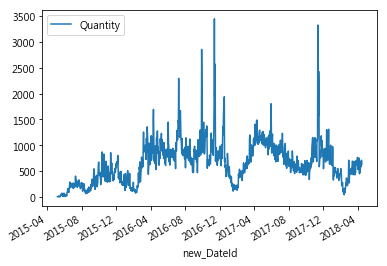

In [262]:
df_tpe_Q.plot(x='new_DateId', y='Quantity')

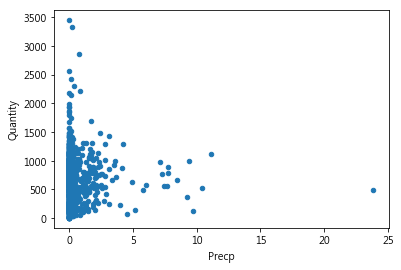

In [263]:
df_tpe_Q.plot.scatter(x='Precp', y='Quantity')

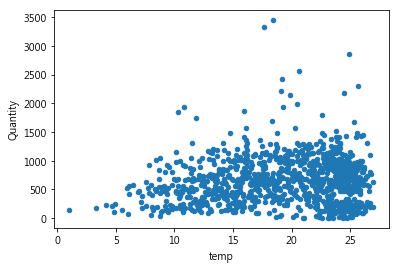

In [265]:
df_tpe_Q.plot.scatter(x='temp', y='Quantity')